In [62]:
import numpy as np
import gym
env = gym.make('FrozenLake8x8-v0')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [342]:
class MC_agent:
    def __init__(self):
        print("Constructing MC agent")
        self.Q = None
    
    def random_policy(self,state,n_actions):
        return np.random.randint(n_actions)
    
    def epsilon_greedy_policy(self,Q,state,n_actions,epsilon):
        if np.random.rand() < epsilon:
            return np.random.randint(n_actions)
        else:
            return Q[state,:].argmax()
        
    def greedy_policy(self,Q,state):
        return Q[state,:].argmax()
    
    def predict(self,env,n_episodes,gamma,policy=False):
        """
        Estimates value function for given policy
        Parameters
            env: the environment e.g. gridworld, frozen-lake
            policy: the policy to be evaluated (parameters: (state, n_actions), returns: (action))
            gamma: the discount factor
        Returns
            V: state-value function
        """
        n_states = env.observation_space.n
        n_actions = env.action_space.n
    
        #initialize state-value function as zeros
        self.V = np.zeros((n_states))
        #initialize state visit counter
        N = np.zeros((n_states))
    
        for episodes in range(n_episodes):
        
            observation = env.reset()
            state_reward_pairs = []
        
            #generate episode of 200 time steps
            for t in range(200):
                
                #get action from policy
                if not policy:
                    action = self.random_policy(observation,n_actions)
                old_observation = observation
                
                #take action 
                observation, reward, done, info = env.step(action)
                
                #save state and reward
                state_reward_pairs.append((old_observation,reward))
                
                if done:
                    break

            #update value function for visited states
            G = 0
            for state,reward in state_reward_pairs[::-1]:
                G = reward + gamma * G
                N[state] += 1
                V[state] += (G - V[state])/N[state]
                
        return V
    
    
    def control(self,env,n_episodes,gamma):
        """
        On-policy control
        Estimates optimal action-value function for environment
        Parameters
            env: the environment e.g. gridworld, frozen-lake
            gamma: the discount factor
        Returns
            Q: action-value function
        """
        n_states = env.observation_space.n
        n_actions = env.action_space.n
    
        #initialize action-value function
        Q = np.zeros((n_states,n_actions))
        #initialize state-action visit counter
        N = np.zeros((n_states,n_actions))
        
        for i_episode in range(n_episodes):
            
            observation = env.reset()
            state_action_reward_tuples = []
            
            for t in range(200):
                action = self.random_policy(observation,n_actions)
                old_observation = observation
                observation, reward, done, info = env.step(action)
                state_action_reward_tuples.append((old_observation, action, reward))
                if done:
                    break
            
            #update action-value function
            G = 0
            for state,action,reward in state_action_reward_tuples[::-1]:
                G = reward + gamma * G
                N[state,action] += 1
                Q[state,action] += (G - Q[state,action])/N[state,action]
        self.Q = Q
        return Q

In [343]:
agent = MC_agent()

Constructing MC agent


In [344]:
agent.greedy_policy(Q,2)

3

In [321]:
V = agent.predict(env,1000,0.9)

In [322]:
Q = agent.control(env,20000,0.9)

In [328]:
agent.Q[3]

array([9.88963546e-05, 1.93551734e-04, 2.37534655e-04, 7.80606406e-05])

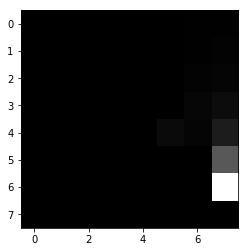

In [316]:
plt.imshow(Q[:,1].reshape((8,8)),cmap="gray")
plt.show()

In [318]:
print(Q[:,1].reshape((8,8)))

[[1.00413980e-05 3.56566679e-05 9.77713349e-05 1.96404521e-04
  3.49589700e-04 6.33728812e-04 2.24116241e-03 2.63676433e-03]
 [1.66206399e-05 1.80298985e-05 2.33928183e-05 1.12600468e-04
  4.41933518e-04 1.30322138e-03 2.05697611e-03 5.79470411e-03]
 [1.83321817e-05 3.16003106e-05 1.60312645e-05 0.00000000e+00
  6.22238641e-04 1.02373922e-03 4.72788911e-03 8.60066885e-03]
 [2.38676513e-06 1.09060761e-04 2.16780276e-04 2.51420837e-05
  0.00000000e+00 0.00000000e+00 1.01178266e-02 1.97932143e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.66045268e-02 8.53567521e-03 4.47150930e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.36709905e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.96875000e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]

In [341]:
np.random.rand()

0.9696318292296302

In [122]:
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [313]:
env.step(1)
env.render()

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [ ]:
1=ned
2=højre
0=venstre
3=op